<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" width="50">

# Capstone Project: Predicting Stock Price Changes of  Healthcare Companies based on News Headlines

### Contents:
#### Part 3 of 3 
- Executive Summary
- Problem Statement
- Background
- Data
- Data Munging
- Exploratory Data Analysis & Visualisation
- [Modelling](#Modelling)
- [Results & Analysis](#Results-&-Analysis)
- [Recommendations & Conclusions](#Recommendations-&-Conclusions)
- [References](#References)

Other Notebooks: [Part 1 of 3](01-Introduction.ipynb) | [Part 2 of 3](02-Data-Munging-and-EDA.ipynb) | [Annex - News WebScraping](Annex_Webscraping.ipynb) | [Annex - Further Scraping & Cleaning](Annex_Webscraping_and_Cleaning_Headlines.ipynb)

### Import Libraries & Data

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max.colwidth', 100)
plt.style.use('_classic_test_patch')

from pycaret.classification import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [2]:
# import csv file as dataframe
df = pd.read_csv('../assets/cleaned_data.csv')

uni_count_df = pd.read_csv('../assets/uni_count_df.csv')
bi_count_df = pd.read_csv('../assets/bi_count_df.csv')
tri_count_df = pd.read_csv('../assets/tri_count_df.csv')

uni_tfidf_df = pd.read_csv('../assets/uni_tfidf_df.csv')
bi_tfidf_df = pd.read_csv('../assets/bi_tfidf_df.csv')
tri_tfidf_df = pd.read_csv('../assets/tri_tfidf_df.csv')

## Comparing Models using PyCaret

In [3]:
# create a function to list the numeric features within a list
def numeric_features(df):
    list_1 = []
    
    for i in df.columns[1::]:
        list_1.append(i)
        
    return list_1

### Count Vectorized Model

In [4]:
# save column names of word vectors in a list 
list1 = numeric_features(uni_count_df)

In [5]:
# set up the pycaret experiment
exp1 = setup(uni_count_df, target = 'target_var', numeric_features = list1)

,Description,Value
0,session_id,8138
1,Target,target_var
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2924, 1001)"
5,Missing Values,False
6,Numeric Features,1000
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
# compare model scores
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7644,0.6249,0.2480,0.5493,0.3388,0.2217,0.2480,0.2820
lr,Logistic Regression,0.7635,0.6509,0.3073,0.5293,0.3864,0.2548,0.2694,0.7690
gbc,Gradient Boosting Classifier,0.7625,0.6441,0.1567,0.5603,0.2438,0.1548,0.1987,0.9920
knn,K Neighbors Classifier,0.7522,0.5745,0.0753,0.4991,0.1300,0.0689,0.1128,0.3570
rf,Random Forest Classifier,0.7439,0.6433,0.2358,0.4640,0.3117,0.1750,0.1904,0.7350
ada,Ada Boost Classifier,0.7429,0.6299,0.2120,0.4715,0.2898,0.1584,0.1795,0.2830
ridge,Ridge Classifier,0.7336,0.0000,0.3391,0.4425,0.3827,0.2180,0.2212,0.0800
qda,Quadratic Discriminant Analysis,0.7327,0.5177,0.0932,0.3407,0.1445,0.0463,0.0594,0.7270
et,Extra Trees Classifier,0.7297,0.6328,0.2855,0.4284,0.3413,0.1806,0.1868,1.2180
svm,SVM - Linear Kernel,0.7048,0.0000,0.3984,0.4020,0.3981,0.2037,0.2045,0.0780


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8138, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
list2 = numeric_features(bi_count_df)

In [8]:
exp2 = setup(bi_count_df, target = 'target_var', numeric_features = list2)

,Description,Value
0,session_id,294
1,Target,target_var
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2924, 1001)"
5,Missing Values,False
6,Numeric Features,1000
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7468,0.5601,0.0681,0.6625,0.1203,0.0722,0.1406,0.8770
lr,Logistic Regression,0.7454,0.5941,0.1647,0.5163,0.2473,0.1434,0.1770,0.0810
lightgbm,Light Gradient Boosting Machine,0.7395,0.5069,0.0057,0.3000,0.0111,0.0017,0.0172,0.0640
ada,Ada Boost Classifier,0.7282,0.5445,0.1286,0.4280,0.1950,0.0850,0.1087,0.2650
ridge,Ridge Classifier,0.7141,0.0000,0.2460,0.4104,0.3059,0.1411,0.1487,0.0560
knn,K Neighbors Classifier,0.7057,0.5304,0.1270,0.3983,0.1780,0.0514,0.0741,0.2790
rf,Random Forest Classifier,0.6999,0.5905,0.2745,0.3829,0.3183,0.1340,0.1371,0.9200
qda,Quadratic Discriminant Analysis,0.6911,0.5568,0.2784,0.3717,0.3112,0.1211,0.1258,0.6450
svm,SVM - Linear Kernel,0.6897,0.0000,0.2688,0.3586,0.3050,0.1128,0.1147,0.0910
dt,Decision Tree Classifier,0.6872,0.5477,0.2745,0.3568,0.3084,0.1125,0.1143,0.4620


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=294, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
list3 = numeric_features(tri_count_df)

In [11]:
exp3 = setup(tri_count_df, target = 'target_var', numeric_features = list3)

,Description,Value
0,session_id,7151
1,Target,target_var
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2924, 1001)"
5,Missing Values,False
6,Numeric Features,1000
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7493,0.5222,0.0463,0.4975,0.0837,0.0479,0.0914,1.6300
lr,Logistic Regression,0.7468,0.5377,0.0599,0.4933,0.1059,0.0555,0.0979,0.4010
lightgbm,Light Gradient Boosting Machine,0.7468,0.5060,0.0000,0.0000,0.0000,0.0000,0.0000,0.0730
ada,Ada Boost Classifier,0.7414,0.5122,0.0502,0.3828,0.0881,0.0364,0.0608,0.5410
rf,Random Forest Classifier,0.7219,0.5321,0.1216,0.3521,0.1794,0.0597,0.0714,1.7970
ridge,Ridge Classifier,0.7209,0.0000,0.1081,0.3391,0.1631,0.0473,0.0585,0.0960
svm,SVM - Linear Kernel,0.7185,0.0000,0.1293,0.3469,0.1877,0.0597,0.0701,0.1620
dt,Decision Tree Classifier,0.7170,0.5135,0.1255,0.3304,0.1807,0.0533,0.0609,0.7060
et,Extra Trees Classifier,0.7155,0.5201,0.1448,0.3490,0.2031,0.0664,0.0758,2.3320
lda,Linear Discriminant Analysis,0.7077,0.5112,0.1621,0.3361,0.2180,0.0658,0.0720,0.8350


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7151, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Tf-idf Vectorized Model

In [13]:
list4 = numeric_features(uni_tfidf_df)

In [14]:
exp4 = setup(uni_tfidf_df, target = 'target_var', numeric_features = list4)

,Description,Value
0,session_id,1815
1,Target,target_var
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2924, 1001)"
5,Missing Values,False
6,Numeric Features,1000
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7581,0.6541,0.1174,0.6720,0.1988,0.1340,0.2056,0.0680
knn,K Neighbors Classifier,0.7483,0.5678,0.1138,0.5774,0.1871,0.1116,0.1654,0.3030
gbc,Gradient Boosting Classifier,0.7473,0.6296,0.1327,0.5470,0.2099,0.1235,0.1682,0.9920
ridge,Ridge Classifier,0.7434,0.0000,0.2425,0.5000,0.3242,0.1912,0.2102,0.0570
ada,Ada Boost Classifier,0.7356,0.6255,0.2445,0.4866,0.3207,0.1791,0.1976,0.2720
rf,Random Forest Classifier,0.7317,0.6234,0.1933,0.4571,0.2684,0.1375,0.1575,0.6230
lightgbm,Light Gradient Boosting Machine,0.7317,0.6055,0.2273,0.4599,0.3029,0.1605,0.1761,0.1550
qda,Quadratic Discriminant Analysis,0.7292,0.5229,0.0966,0.4255,0.1545,0.0613,0.0887,0.7000
et,Extra Trees Classifier,0.7229,0.6216,0.2443,0.4332,0.3091,0.1542,0.1648,1.2300
svm,SVM - Linear Kernel,0.7033,0.0000,0.3373,0.4107,0.3597,0.1744,0.1793,0.0760


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1815, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
list5 = numeric_features(bi_tfidf_df)

In [17]:
exp5 = setup(bi_tfidf_df, target = 'target_var', numeric_features = list5)

,Description,Value
0,session_id,3624
1,Target,target_var
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2924, 1001)"
5,Missing Values,False
6,Numeric Features,1000
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7659,0.5997,0.0432,0.6356,0.0787,0.0506,0.1121,0.0740
gbc,Gradient Boosting Classifier,0.7644,0.5598,0.0802,0.5236,0.1347,0.0807,0.1275,0.9290
lightgbm,Light Gradient Boosting Machine,0.7571,0.5161,0.0082,0.1778,0.0152,-0.0008,0.0060,0.0810
ada,Ada Boost Classifier,0.7517,0.5490,0.1665,0.4521,0.2397,0.1284,0.1528,0.2850
knn,K Neighbors Classifier,0.7439,0.5453,0.0718,0.3427,0.1167,0.0353,0.0524,0.2850
ridge,Ridge Classifier,0.7429,0.0000,0.1726,0.3999,0.2377,0.1151,0.1297,0.0540
rf,Random Forest Classifier,0.7317,0.5789,0.1868,0.3697,0.2447,0.1053,0.1147,1.0760
qda,Quadratic Discriminant Analysis,0.7234,0.4784,0.1563,0.2876,0.1973,0.0648,0.0691,0.6900
svm,SVM - Linear Kernel,0.7209,0.0000,0.2547,0.3752,0.3010,0.1357,0.1404,0.0920
et,Extra Trees Classifier,0.7155,0.5660,0.2321,0.3522,0.2770,0.1111,0.1153,2.0750


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3624, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
list6 = numeric_features(tri_tfidf_df)

In [20]:
exp6 = setup(tri_tfidf_df, target = 'target_var', numeric_features = list6)

,Description,Value
0,session_id,4871
1,Target,target_var
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2924, 1001)"
5,Missing Values,False
6,Numeric Features,1000
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7483,0.5702,0.0058,0.1500,0.0113,0.0057,0.0171,0.0610
ada,Ada Boost Classifier,0.7483,0.5331,0.0660,0.5110,0.1155,0.0613,0.1069,0.2520
lightgbm,Light Gradient Boosting Machine,0.7483,0.4965,0.0000,0.0000,0.0000,0.0000,0.0000,0.0760
gbc,Gradient Boosting Classifier,0.7454,0.5422,0.0291,0.4683,0.0535,0.0221,0.0540,0.7190
ridge,Ridge Classifier,0.7400,0.0000,0.0873,0.4447,0.1425,0.0633,0.0951,0.0440
rf,Random Forest Classifier,0.7327,0.5492,0.1203,0.4002,0.1835,0.0765,0.0968,0.7060
dt,Decision Tree Classifier,0.7302,0.5298,0.1360,0.4003,0.2024,0.0847,0.1033,0.3630
et,Extra Trees Classifier,0.7287,0.5497,0.1495,0.4045,0.2173,0.0926,0.1105,1.5300
svm,SVM - Linear Kernel,0.7282,0.0000,0.1455,0.4089,0.2120,0.0888,0.1085,0.0680
knn,K Neighbors Classifier,0.7117,0.5344,0.1234,0.3885,0.1362,0.0423,0.0647,0.2290


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4871, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Selection: 1-gram Tf-idf Vectorized Logistic Regression Model

The following results were obtained using PyCaret's model comparison function:

|S/N|Model|Vectorizer|N-Gram|Accuracy|AUC|Recall|Precision|F1|
|:---|---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1|Light Gradient Boosting Machine|Count|1-gram|0.764|0.625|0.248|0.549|0.339|
|2|Logistic Regression|Count|1-gram|0.764|0.651|0.307|0.529|0.386|
|3|Gradient Boosting Classifier|Count|2-gram|0.747|0.560|0.068|0.663|0.120|
|4|Logistic Regression|Count|2-gram|0.745|0.594|0.165|0.516|0.247|
|5|Gradient Boosting Classifier|Count|3-gram|0.749|0.522|0.046|0.496|0.084|
|6|Logistic Regression|Count|3-gram|0.747|0.538|0.060|0.493|0.106|
|**7**|**Logistic Regression**|**Tf-idf**|**1-gram**|**0.758**|**0.654**|**0.117**|**0.672**|**0.199**|
|8|K Neighbors Classifier|Tf-idf|1-gram|0.748|0.568|0.114|0.577|0.187|
|9|Logistic Regression|Tf-idf|2-gram|0.766|0.600|0.043|0.636|0.079|
|10|Gradient Boosting Classifier|Tf-idf|2-gram|0.764|0.600|0.080|0.524|0.135|
|11|Logistic Regression|Tf-idf|3-gram|0.748|0.570|0.006|0.150|0.011|
|12|Ada Boosting Classifier|Tf-idf|3-gram|0.748|0.533|0.066|0.511|0.116|

I choose to further train and tune the 1-gram count-vectorized logistic regression model because it had the highest precision score and the accuracy and AUC scores were among the highest (i.e. fifth and second highest respectively).

## Modelling

### Train-Test Split

In [167]:
df.head()

,date,adjusted_abs,adj_direction,cleaned,headline_word,dict_score,target_var
0,2012-01-13,0.164794,negative,nestle decline comment unit bid report,6,-1,0
1,2012-01-27,0.647985,negative,fda approves inlyta kidney cancer,5,2,0
2,2012-01-31,0.796045,negative,generic take toll profit trim view citing stronger dollar,9,-1,0
3,2012-02-07,0.224445,positive,india spin off animal dealtalk nestle lead scoop up baby formula unit dealtalk nestle lead scoop...,20,0,0
4,2012-02-14,0.266436,positive,best hope alzheimer best hope alzheimer,6,0,0


In [168]:
# set up the IVs and DV for modelling
X = df['cleaned']
y = df["target_var"]
print(X.shape)
print(y.shape)

(2924,)
(2924,)


In [169]:
# shuffle dataset, set test size as 30% per industry norm
# stratify the train-test split based on target variable
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y, random_state=42)

In [170]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2046,)
(2046,)
(878,)
(878,)


### Hyperparameter Tuning 

In [172]:
# set a pipeline up with two stages:
# 1. Tf-idfVectorizer (transformer)
# 2. Logistic Regression (estimator)

pipe = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=10_000))
])

In [173]:
# use GridCV to search over the following values of hyperparameters:
# Maximum number of features fit: 500, 750, 1_000
# Minimum number of word occurences needed to include token: 1, 2, 3
# Maximum documents frequency needed to include token: 10%, 20%, 30%, 40%, 50%

pipe_params = {
    'tf-idf__max_features': [500, 750, 1_000],
    'tf-idf__min_df': [1, 2, 3],
    'tf-idf__max_df': [.1, .2, .3, .4, .5],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['lbfgs', 'liblinear', 'saga']
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params, 
                  cv=5) # 5-fold cross-validation.

In [174]:
# fit GridSearch to training data
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tf-idf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        

In [175]:
# find out what's the best parameters for tf-idf vectorization
gs.best_params_

{'logreg__penalty': 'l2',
 'logreg__solver': 'lbfgs',
 'tf-idf__max_df': 0.1,
 'tf-idf__max_features': 750,
 'tf-idf__min_df': 2}

### Final Model Evaluation

In [176]:
# mean cross-validated score of the best_estimator
print("mean cv score of the best estimator: ", gs.best_score_) 

# score model on training set
print("accuracy score on train set: ", gs.score(X_train, y_train))

# score model on testing set
print("accuracy score on test set: ", gs.score(X_test, y_test))

mean cv score of the best estimator:  0.7712672192736596
accuracy score on train set:  0.7966764418377321
accuracy score on test set:  0.7710706150341685


In [177]:
print('Tf-Idf Vectorizer-Logistic Regression:')
print(' ')

print('Train Accuracy Score:', gs.score(X_train, y_train))
predicted_prob_y_train = gs.predict_proba(X_train)
print('Train ROC AUC Score:', 
      metrics.roc_auc_score(y_train, predicted_prob_y_train[:, 1]))
predicted_y_test = gs.predict(X_test)
print('Test Accuracy Score:', metrics.accuracy_score(y_test, predicted_y_test))
predicted_prob_y_test = gs.predict_proba(X_test)
print('Test ROC AUC Score:', 
      metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))

print(' ')
print('Classification Report:')
print(' ')
print(metrics.classification_report(y_test, predicted_y_test))

Tf-Idf Vectorizer-Logistic Regression:
 
Train Accuracy Score: 0.7966764418377321
Train ROC AUC Score: 0.8690349764465154
Test Accuracy Score: 0.7710706150341685
Test ROC AUC Score: 0.6424844617207475
 
Classification Report:
 
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       659
           1       0.75      0.12      0.21       219

    accuracy                           0.77       878
   macro avg       0.76      0.55      0.54       878
weighted avg       0.77      0.77      0.70       878



In [178]:
# print confusion matrix
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predicted_y_test))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted_y_test).ravel()
print()
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)
print('True Positives:', tp)

Confusion Matrix:
[[650   9]
 [192  27]]

True Negatives: 650
False Positives: 9
False Negatives: 192
True Positives: 27


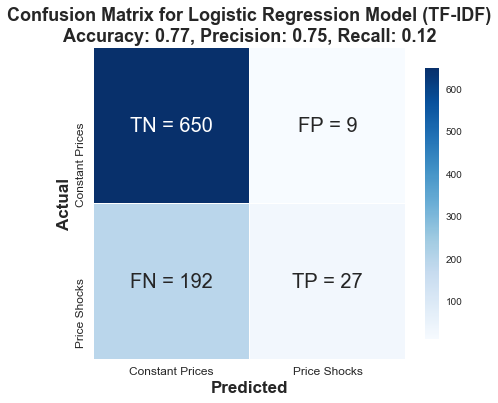

In [179]:
# generate confusion matrix
cm = confusion_matrix(y_test, predicted_y_test)

# create modified labels for confusion matrix
modified_cm = []

for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

# plot it!
plt.figure(figsize=(7,10))
ax = sns.heatmap(cm, annot=np.array(modified_cm),
                 fmt="", annot_kws={"size": 20},
                 linewidths=.5, square = True,
                 cmap = 'Blues', cbar_kws={"shrink": .5})

plt.title("Confusion Matrix for Logistic Regression Model (TF-IDF)"+ "\n"
          + 'Accuracy: {0:.2f}'.format(accuracy_score(y_test, predicted_y_test)) + ", "
          + 'Precision: {0:.2f}'.format(precision_score(y_test, predicted_y_test)) + ", "
          + 'Recall: {0:.2f}'.format(recall_score(y_test, predicted_y_test)), 
          size = 18, fontweight='bold')
plt.ylabel('Actual', fontsize = 17, fontweight='bold')
plt.xlabel('Predicted', fontsize = 17, fontweight='bold')
ax.set_xticklabels(["Constant Prices", "Price Shocks"], fontsize = 12)
ax.set_yticklabels(["Constant Prices", "Price Shocks"], fontsize = 12, rotation = 90);

In [180]:
print('ROC AUC Score:', metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))

ROC AUC Score: 0.6424844617207475


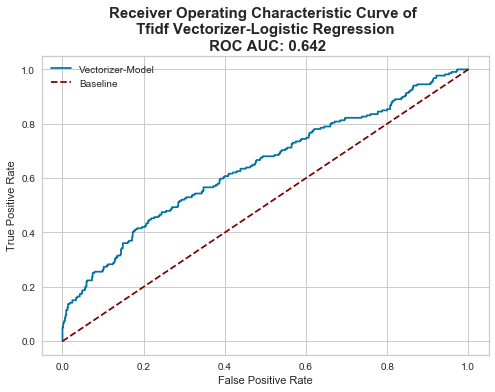

In [181]:
# plot roc curve
metrics.plot_roc_curve(gs.best_estimator_, X_test, y_test, label='Vectorizer-Model');
plt.plot([0, 1], [0, 1], label='Baseline', linestyle='--', color='maroon');

plt.title('Receiver Operating Characteristic Curve of \n Tfidf Vectorizer-Logistic Regression \n ROC AUC: 0.642', 
          fontweight='bold', fontsize=15);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');
plt.legend();

## Results & Analysis

The model has an accuracy score of 0.77, a ROC AUC score of 0.642 and a 0.75 precision score. While the precision score is high, it is obtained at the expense of a lower recall score of 0.12. This means the model will be relatively good at predicting when a news headline would likely be a price shocker. However, the model may misclassify other news headlines which are price shockers as non-price shockers. This may lead to traders missing out on a significant news events that would affect stock prices significantly. 

#### A Further Look at Look at Feature Importances

In [182]:
# get feature names (from the tfidf vectorizer)
name = gs.best_estimator_.named_steps['tf-idf'].get_feature_names()

# get coefficients (of the logistic regression model)
coef = gs.best_estimator_.named_steps['logreg'].coef_.reshape(-1)

# print coefficients
print('Coefficients:', coef)

Coefficients: [ 1.46251688e-01  4.91107594e-01  4.27001709e-02 -2.44581006e-01
 -7.08709732e-01  8.06641991e-01 -1.67921831e-01 -8.32942973e-02
 -6.60454854e-01  3.41955632e-01 -5.42824628e-01 -1.43713790e-01
 -4.75433006e-01 -9.29730287e-02  4.00424441e-01  4.62375185e-03
 -3.47535362e-02 -2.34495997e-01  2.59698185e-01 -2.53677639e-01
  5.03478150e-02 -1.45438358e-01 -5.21148139e-01 -1.12121868e-01
 -5.97154013e-02 -1.33038059e-01 -1.20334024e-01 -1.10064074e-02
  1.06177447e+00 -3.52706022e-02 -4.41049305e-01  1.29842652e+00
 -2.30792604e-01 -3.20390589e-01 -1.50695835e-01 -8.90453035e-02
  8.68440801e-01 -7.60165064e-01  7.25939535e-01  1.77161023e+00
 -4.41409648e-01 -7.95861041e-02 -3.63637034e-01 -1.41276403e-01
  7.63170284e-01  1.31981506e-01  5.71119261e-02 -5.23766590e-01
 -1.38319695e-01 -2.51551396e-01 -3.53555901e-01 -3.22747248e-01
  8.13691087e-02  8.00269583e-02  5.65547273e-01  3.15377675e-01
 -6.08153550e-01  7.97581154e-01  6.14348814e-01 -3.93743830e-01
 -4.9158871

In [183]:
# show the top 30 features that predict price shocks (which was assigned 1 in the target column)
coef_df = pd.DataFrame({'Feature': name, 'Coefficients': coef}).sort_values('Coefficients', ascending=False)
coef_df["abs_coefficient"] = abs(coef_df["Coefficients"])
coef_df.set_index("Feature", inplace=True)

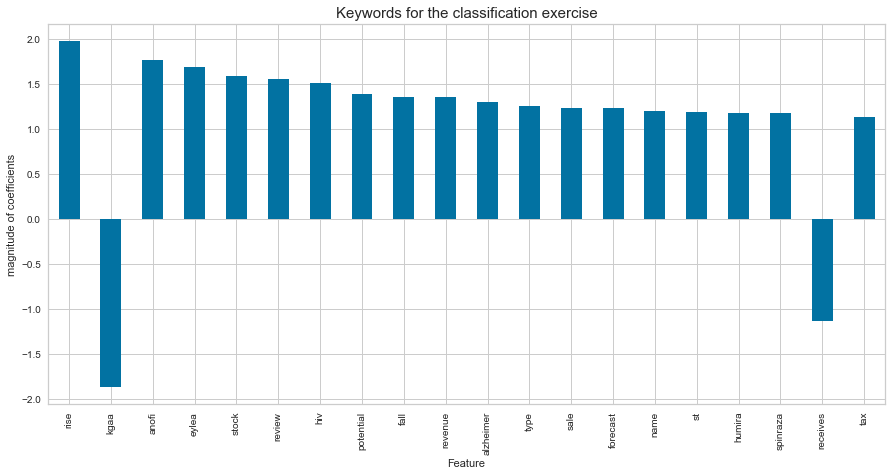

In [184]:
plt.title("Keywords for the classification exercise", fontsize=15)
coef_df.sort_values(by=["abs_coefficient"], ascending=False)["Coefficients"].head(20).plot.bar(figsize=(15, 7))
plt.ylabel("magnitude of coefficients");

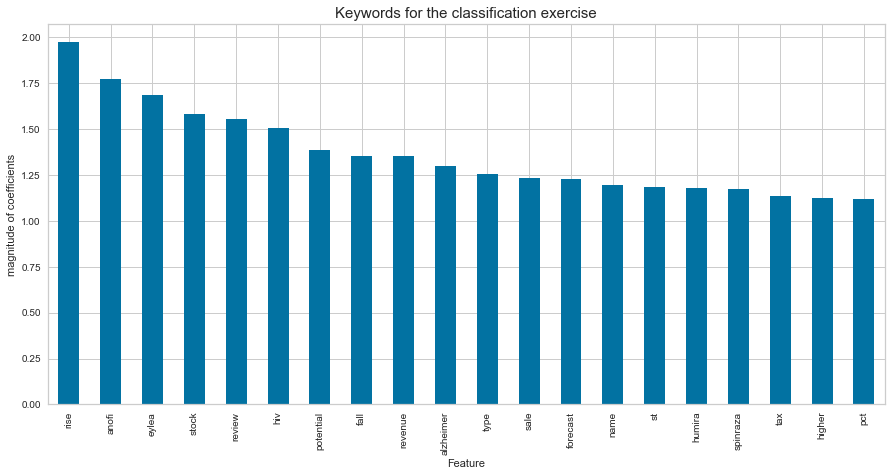

In [185]:
plt.title("Keywords for the classification exercise", fontsize=15)
coef_df.sort_values(by=["Coefficients"], ascending=False)["Coefficients"].head(20).plot.bar(figsize=(15, 7))
plt.ylabel("magnitude of coefficients");

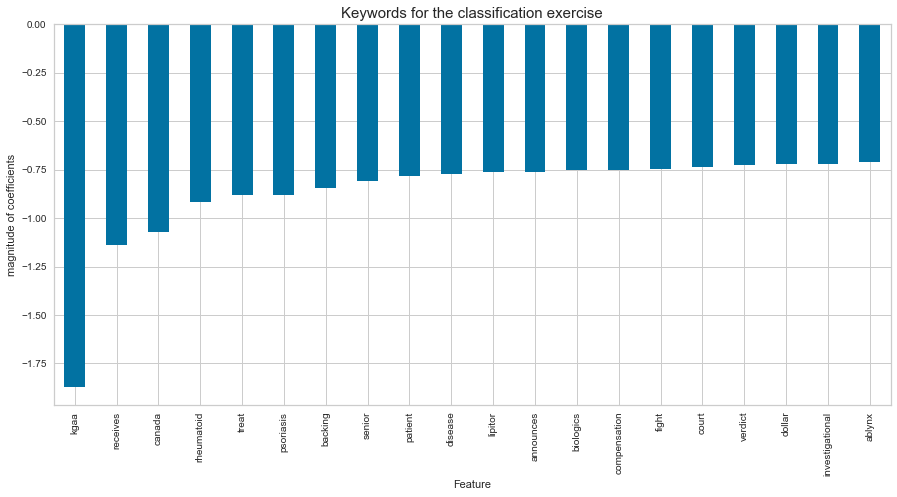

In [186]:
plt.title("Keywords for the classification exercise", fontsize=15)
coef_df.sort_values(by=["Coefficients"], ascending=True)["Coefficients"].head(20).plot.bar(figsize=(15, 7))
plt.ylabel("magnitude of coefficients");

There seems to be no clear inference to be made of the single-word features in the above charts.

### Further Modelling for 3-gram tf-idf vectorizer to look at feature importances for 3-word phrases

In [187]:
pipe_3gram = Pipeline([
    ('tf-idf', TfidfVectorizer(ngram_range=(3,3))),
    ('logreg', LogisticRegression(max_iter=10_000))
])

In [188]:
# Instantiate GridSearchCV.
gs_3gram = GridSearchCV(pipe_3gram, param_grid=pipe_params, cv=5) # 5-fold cross-validation.

In [189]:
# fit GridSearch to training data
gs_3gram.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tf-idf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(3, 3),
                                                        

In [190]:
# find out what's the best parameters for tf-idf vectorization
gs_3gram.best_params_

{'logreg__penalty': 'l2',
 'logreg__solver': 'lbfgs',
 'tf-idf__max_df': 0.1,
 'tf-idf__max_features': 750,
 'tf-idf__min_df': 2}

In [191]:
# get feature names (from the tfidf vectorizer)
name = gs_3gram.best_estimator_.named_steps['tf-idf'].get_feature_names()

# get coefficients (of the logistic regression model)
coef = gs_3gram.best_estimator_.named_steps['logreg'].coef_.reshape(-1)

# print coefficients
print('Coefficients:', coef)

Coefficients: [ 0.1277769   0.31789468  1.22327748  0.34799011 -0.22832921 -0.24061273
 -0.19934    -0.33019739 -0.28491795 -0.30532862 -0.07367053  0.24538135
 -0.08850324  0.30085751 -0.24920644  0.74204706  0.13701147 -0.26858811
 -0.3068825  -0.20884391 -0.15161932  1.04941302 -0.19168332 -0.25258361
  0.13105992  0.04596886 -0.2557805   0.12353579  0.19630453  0.12353579
 -0.14767494  0.26205899  0.20659209  0.3438447  -0.36172826  0.21322223
  0.17547278  0.77616337  0.31309575  0.31309575 -0.2557805  -0.49807745
  0.16132774 -0.23654568  0.31430538 -0.24122643  0.19264929 -0.40010213
 -0.25504681 -0.49486617  0.21760105 -0.36172826 -0.23487666  0.84384854
  0.26205899 -0.06961464  0.77618632  0.18530369 -0.10045347  0.10148716
 -0.18086413 -0.31522708  0.02249714 -0.45980104 -0.14294208  0.14956896
  0.21397027  0.62451861  0.26205899  0.07538987 -0.2557805   0.19187429
 -0.29682726  0.64434775 -0.28649211 -0.36926909 -0.29190194 -0.08850324
 -0.167978   -0.3106806   0.37060738 

In [192]:
# show the top 30 features that predict price shocks (which was assigned 1 in the target column)
coef_df = pd.DataFrame({'Feature': name, 'Coefficients': coef}).sort_values('Coefficients', ascending=False)
coef_df["abs_coefficient"] = abs(coef_df["Coefficients"])
coef_df.set_index("Feature", inplace=True)

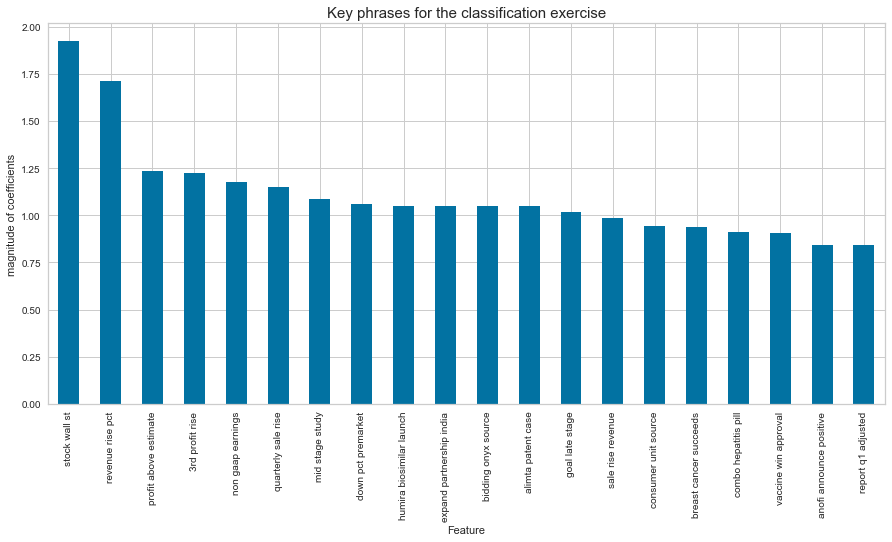

In [194]:
plt.title("Key phrases for the classification exercise", fontsize=15)
coef_df.sort_values(by=["Coefficients"], ascending=False)["Coefficients"].head(20).plot.bar(figsize=(15, 7))
plt.ylabel("magnitude of coefficients");

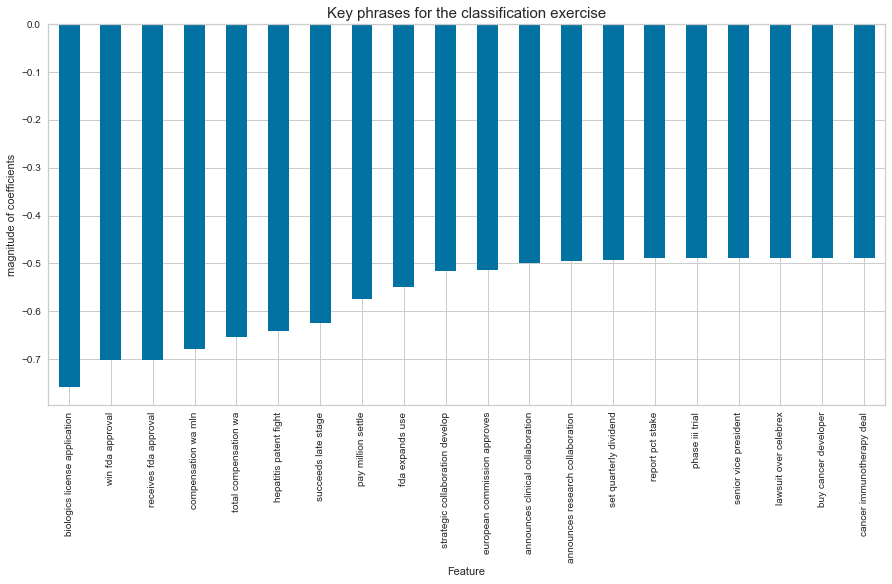

In [195]:
plt.title("Key phrases for the classification exercise", fontsize=15)
coef_df.sort_values(by=["Coefficients"], ascending=True)["Coefficients"].head(20).plot.bar(figsize=(15, 7))
plt.ylabel("magnitude of coefficients");

Based on the two charts above, we see that the three-word features that affect prices more significantly tended to be related to financial reporting (i.e. quarterly profits/ sales reporting) or mid-stage to late-stage study/trial. Interestingly, the final announcement of the FDA/commission approval or success reported at late stage study tended to not lead to large changes in stock prices. This suggests that there may be some truth to the saying that traders 'buy the rumor, and sell the news' in the biotech or healthcare industry. Traders/investors may have already placed their bets or made their trade assessments based on interim updates on the companies' clinical trial results. While the final approval by regulatory bodies is a significant milestone for the healthcare companies, it may not lead to a significant jump in stock prices as the expected approval was already priced in by the trade activities before the actual announcement. 

## Recommendations & Conclusions

1. News headlines can be used to predict changes to stock prices. The tf-idf logistic regression model is able to achieve > 70% accuracy and precision scores, and > 60% AUC ROC scores.   

2. The release of positive/ negative news may not necessarily lead to a jump in stock prices. From this modelling experience, we learn that the announcement of significant milestones (such as FDA approval) may not lead to significant stock price changes.  

####  Recommendations for Future Projects to Improve Use Case and Model Performance

   - Aggregate news headlines from more sources (e.g. Financial Times, Seeking Alpha) for analysis
   - Beyond headlines, there is also an opportunity to study how the long-form texts from news articles affect stock prices
   - Aggregate news headlines for more healthcare, pharmaceutical or biotech companies for analysis

## References

[1] https://github.com/Ethkoh/GA_DSI_Projects/tree/master/project_5  
[2] https://arxiv.org/ftp/arxiv/papers/1812/1812.04199.pdf  
[3] https://github.com/queensbamlab/NewsSentiments/blob/master/dict.csv  
[4] https://github.com/xarismallios/Predicting-Stock-Prices-With-Financial-News/blob/main/final_report.pdf  
[5] https://www.researchgate.net/publication/222535436_Stock_Price_Reaction_to_News_and_No-News_Drift_and_Reversal_after_Headlines